In [ ]:
from fastai.vision.all import *

In [ ]:
path = untar_data(URLs.PETS)/'images'

In [ ]:
fnames = get_image_files(path/'images')
pat = r'(.+)_\d+.jpg$'
item_tfms = RandomResizedCrop(460, min_scale=0.75, ratio=(1.,1.))
batch_tfms = [*aug_transforms(size=224, max_warp=0), Normalize.from_stats(*imagenet_stats)]
bs=64

In [ ]:
pets = DataBlock(blocks=(ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(),
                 get_y=RegexLabeller(pat = r'/([^/]+)_\d+.*'),
                 item_tfms=item_tfms,
                 batch_tfms=batch_tfms)

In [ ]:
def label_to_list(o): return [o]

In [ ]:
multi_pets = DataBlock(
    blocks=(ImageBlock, MultiCategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(),
    get_y=Pipeline(
        [RegexLabeller(pat = r'/([^/]+)_\d+.*'), label_to_list]
    ),
    item_tfms=item_tfms,
    batch_tfms=batch_tfms
)

In [ ]:
dls = multi_pets.dataloaders(path, bs=32)

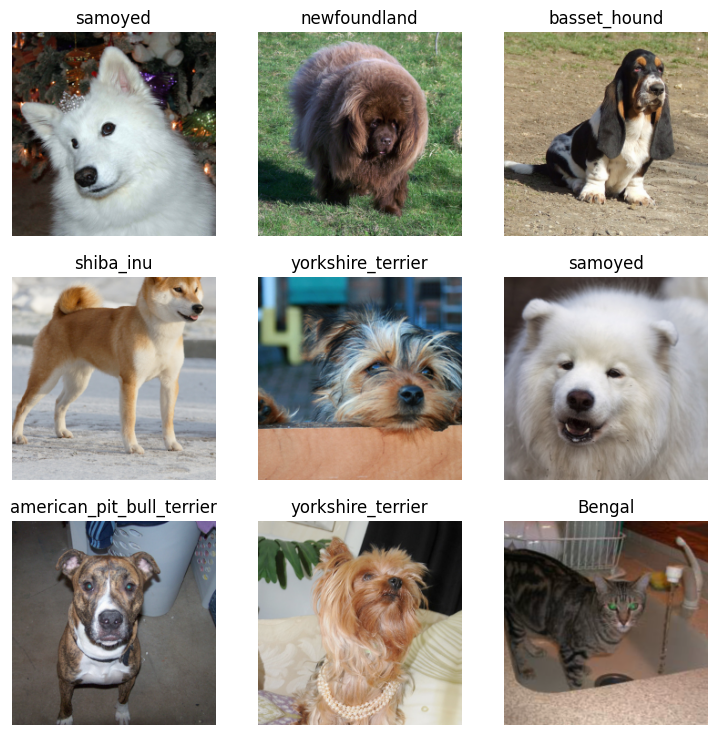

In [ ]:
dls.show_batch()

In [ ]:
train_idxs, valid_idxs = RandomSplitter()(get_image_files(path))

In [ ]:
tfms = [
    [PILImage.create],
    [
        RegexLabeller(pat = r'/([^/]+)_\d+.*'),
        label_to_list,
        MultiCategorize(vocab=list(dls.vocab)),
        OneHotEncode(len(dls.vocab))
    ]
]

In [ ]:
dsets = Datasets(get_image_files(path), tfms=tfms, splits=[train_idxs, valid_idxs])

In [ ]:
dsets[0]

(PILImage mode=RGB size=500x333,
 TensorMultiCategory([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.]))

In [ ]:
dls = dsets.dataloaders(
    after_item=[ToTensor(), RandomResizedCrop(460, min_scale=.75)],
    after_batch=[IntToFloatTensor(), *aug_transforms(size=224, max_warp=0), Normalize.from_stats(*imagenet_stats)],
    bs=32
)

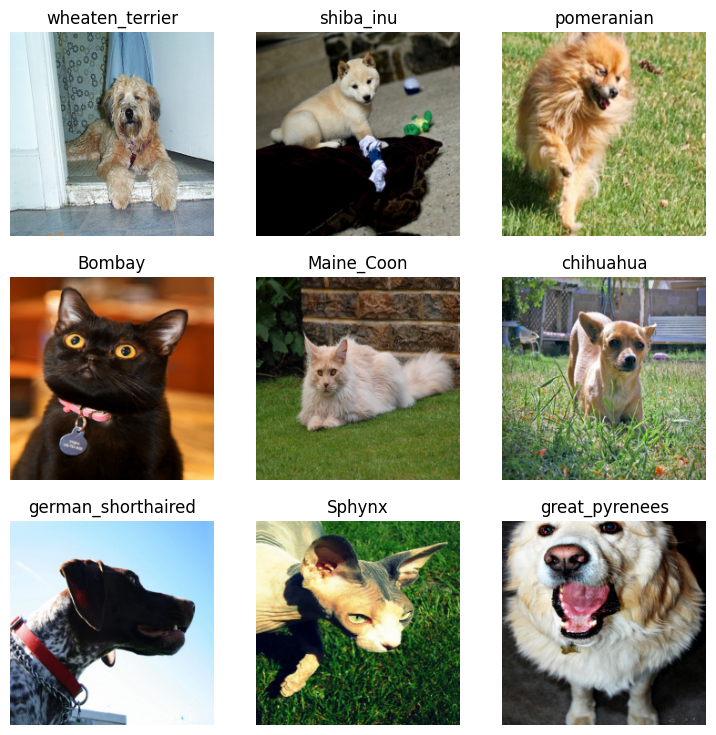

In [ ]:
dls.show_batch()

In [ ]:
learn = vision_learner(dls, resnet34, metrics=[partial(accuracy_multi, thresh=0.95)])

In [ ]:
learn.fine_tune(4, 2e-3)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.412115,0.069953,0.973741,00:35


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.052030,0.024630,0.981823,00:41
1,0.025953,0.014660,0.989120,00:41
2,0.016864,0.011797,0.991241,00:41
3,0.010502,0.010177,0.992301,00:41


In [ ]:
learn.loss_func.thresh = 0.95

In [ ]:
PERSIAN_CAT_URL = "https://azure.wgp-cdn.co.uk/app-yourcat/posts/iStock-174776419-1.jpg"

In [ ]:
response = requests.get(PERSIAN_CAT_URL)
im = PILImage.create(response.content)

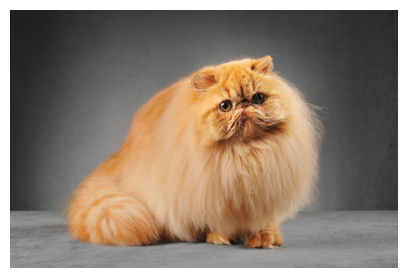

In [ ]:
im.show();

In [ ]:
learn.predict(im)[0]

(#1) ['Persian']

In [ ]:
DONKEY_URL = "https://cdn.britannica.com/68/143568-050-5246474F/Donkey.jpg"
response = requests.get(DONKEY_URL)
learn.predict(response.content)[0]

(#0) []